In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# load all patient files and store them in a dictionary named patients
patients = {}
for m in range(1,54):
    patients[f"patient{m}"] = pd.read_csv(
        f'bidmc_{str(m).zfill(2)}_Numerics.csv',
    na_values='NaN'
    )
    patients[f'patient{m}']['id'] = [m]*len(patients[f'patient{m}']) 
    #add id column


In [3]:
# Extract age and gender data from text files

patient_age = {}
patient_gender_M = {}
patient_gender_F = {}

for x in range(1, 54):
    with open (f'bidmc_{str(x).zfill(2)}_Fix.txt') as pt:
        for rec in pt:
            if rec[0:3] == 'Age':
                if not rec[5:7] == 'Na':
                    patient_age[f'patient{x}'] = int(rec[5:7])
                else:
                    patient_age[f'patient{x}'] = 'NaN'
            if rec[0:3] == 'Gen':
                if rec[8] == 'M':
                    patient_gender_M[f'patient{x}'] = 1
                    patient_gender_F[f'patient{x}'] = 0
                elif rec[8] == 'F':
                    patient_gender_F[f'patient{x}'] = 1
                    patient_gender_M[f'patient{x}'] = 0
                else:
                    print(f'patient{x}')
                    patient_gender_F[f'patient{x}'] = 'NaN'
                    patient_gender_M[f'patient{x}'] = 'NaN'
                

# create new columns for age and gender and assign them to each patient
for dat in range(1,54):
    patients[f'patient{dat}']['age'] = patient_age[f'patient{dat}']
    patients[f'patient{dat}']['gender_M'] = patient_gender_M[f'patient{dat}']
    patients[f'patient{dat}']['gender_F'] = patient_gender_F[f'patient{dat}']

patient18


In [4]:
list(patients['patient1'])

['Time [s]',
 ' HR',
 ' PULSE',
 ' RESP',
 ' SpO2',
 'id',
 'age',
 'gender_M',
 'gender_F']

In [5]:
# rename column names for all patient files

for patient in patients:
    patients[patient].rename({
        "Time [s]":"time",
        " HR": "hr",
        " PULSE": "pulse",
        " RESP":"resp",
        " SpO2": "spo2"
    }, axis=1, inplace=True)

In [6]:
# identify which patients have missing information
patient_features = ['time', 'hr', 'pulse', 'resp', 'spo2', 'age', 'gender_M', 'gender_F']
indicator = 1
for patient in patients:
    patients[patient].replace('NaN', np.nan, inplace=True)
    
    for feature in patient_features:
        if patients[patient][feature].isna().sum() > 0:
            print(f"patient{indicator}")
            print(patients[patient].isna().sum())
            break
    indicator = indicator + 1

patient1
time         0
hr           0
pulse       13
resp         0
spo2        13
id           0
age          0
gender_M     0
gender_F     0
dtype: int64
patient5
time        0
hr          0
pulse       6
resp        0
spo2        6
id          0
age         0
gender_M    0
gender_F    0
dtype: int64
patient13
time          0
hr            0
pulse         0
resp        146
spo2          0
id            0
age           0
gender_M      0
gender_F      0
dtype: int64
patient15
time        0
hr          0
pulse       0
resp        3
spo2        0
id          0
age         0
gender_M    0
gender_F    0
dtype: int64
patient18
time          0
hr            0
pulse         0
resp          0
spo2          0
id            0
age         481
gender_M    481
gender_F    481
dtype: int64
patient19
time          0
hr            0
pulse       102
resp          4
spo2        102
id            0
age           0
gender_M      0
gender_F      0
dtype: int64
patient25
time        0
hr          0
pulse  

In [7]:

patients['patient19']['resp'].isnull().sum()

4

## List of patients with missing data
patient 1 (13 pulse/spo2) patient 13 (146 resp) patient 15 (3 resp) patient 19 (102 pulse/spo2 and 4 resp) patient 27 (4 hr), patient 25 (1 pulse/spo2) patient 44 (6 pulse/spo2)

In [8]:
# remove rows where there are missing pulse values
for patient in patients:
    patients[patient].dropna(how='any', subset=['pulse'], inplace=True)

In [9]:
# make new list of patient profiles concatinated together
patients_df= []
for patient in patients:
    patients_df.append(patients[patient])

In [10]:
# Combine all patient profiles into one
patients_df = pd.concat(patients_df)

In [11]:
patients_df.reset_index(drop=True, inplace=True)

In [12]:
patients_df['resp'].isnull().sum()

153

In [13]:
# drop all rows with missing resp values
patients_df.dropna(how='any', subset=['resp'], inplace=True)

In [14]:
# drop all rows with missing hr values
patients_df.dropna(how='any', subset=['hr'], inplace=True)

In [15]:
# drop all rows with missing age values
patients_df.dropna(how='any', subset=['age'], inplace=True)

In [16]:
# train model with k value of 2
kmeans = KMeans(n_clusters=2, random_state=0)

In [17]:
kmeans.fit(patients_df)
groups = kmeans.labels_

In [18]:
unique, counts = np.unique(groups, return_counts=True)
dict(zip(unique, counts))

{0: 12411, 1: 12316}

In [19]:
kmeans.cluster_centers_

array([[359.98485215,  89.24534687,  88.68262026,  17.46636049,
         96.70614777,  27.27419225,  64.61896705,   0.38812344,
          0.61187656],
       [119.40841182,  89.46151348,  88.55245209,  17.55984086,
         96.65272816,  27.3429685 ,  64.56341345,   0.38835661,
          0.61164339]])

In [20]:
titles = list(patients_df)

In [21]:
# swap id and time columns
titles[0], titles[5] = titles[5], titles[0]

In [22]:
patients_df = patients_df[titles]

In [23]:
patients_df

,id,hr,pulse,resp,spo2,time,age,gender_M,gender_F
0,1,94.0,93.0,25.0,97.0,0,88.0,1.0,0.0
1,1,94.0,93.0,25.0,97.0,1,88.0,1.0,0.0
2,1,94.0,93.0,25.0,97.0,2,88.0,1.0,0.0
3,1,92.0,93.0,26.0,97.0,3,88.0,1.0,0.0
4,1,93.0,93.0,26.0,97.0,4,88.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
25360,53,92.0,95.0,18.0,100.0,476,81.0,1.0,0.0
25361,53,90.0,95.0,19.0,100.0,477,81.0,1.0,0.0
25362,53,97.0,95.0,19.0,100.0,478,81.0,1.0,0.0
25363,53,99.0,95.0,19.0,100.0,479,81.0,1.0,0.0


In [24]:
# train kmeans model for two centroids
kmean = KMeans(n_clusters=2, random_state=0)
kmean.fit(patients_df)
clusters = kmean.labels_

In [25]:
# display the number of data points within each cluster
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{0: 12411, 1: 12316}

In [26]:
kmean.cluster_centers_

array([[ 27.27419225,  89.24534687,  88.68262026,  17.46636049,
         96.70614777, 359.98485215,  64.61896705,   0.38812344,
          0.61187656],
       [ 27.3429685 ,  89.46151348,  88.55245209,  17.55984086,
         96.65272816, 119.40841182,  64.56341345,   0.38835661,
          0.61164339]])

As shown above, changing the order of the columns (id column to first and time column to last) does not affect how the model groups together the data.

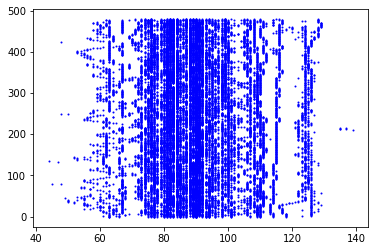

In [27]:
plt.scatter(patients_df['hr'], patients_df['time'], s = 1, c = 'b')
plt.show()

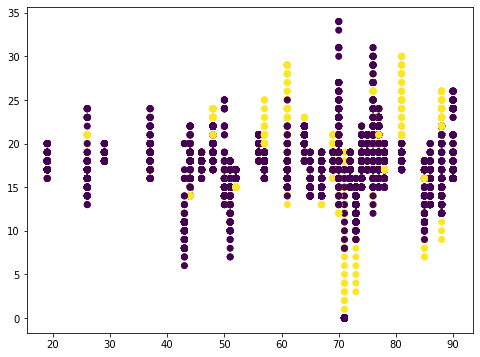

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(patients_df['age'], patients_df['resp'], c=kmean.labels_.astype(float))

In [29]:
kmean4 = KMeans(n_clusters=4, random_state=0).fit(patients_df.drop(columns=['time', 'id']))
clusters4 = kmean4.labels_

In [30]:
unique, counts = np.unique(clusters4, return_counts=True)
dict(zip(unique, counts))

{0: 7135, 1: 3942, 2: 7928, 3: 5722}

In [31]:
kmean4.cluster_centers_

array([[ 79.64723196,  78.17813595,  16.92669937,  95.59004905,
         76.90049054,   0.26475123,   0.73524877],
       [112.14129883, 111.98021309,  17.45865043,  97.23896499,
         47.5058346 ,   0.37569762,   0.62430238],
       [ 93.044778  ,  92.44033804,  18.3015893 ,  96.89492936,
         75.43377901,   0.48826942,   0.51173058],
       [ 80.64120937,  80.24432017,  17.18857043,  97.35424677,
         45.99038798,   0.41226844,   0.58773156]])

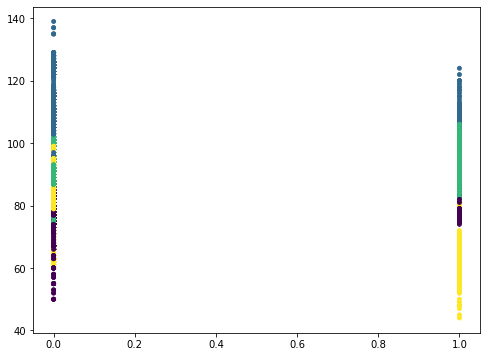

In [35]:
# plot scatter with different colours for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(patients_df['gender_M'], patients_df['hr'], c=kmean4.labels_.astype(float), s=15)

In [33]:
from sklearn.metrics import silhouette_score

z = patients_df.drop(columns=['time', 'id'])
label = kmean.predict(patients_df)
label4 = kmean4.predict(z)

kmean2 = KMeans(n_clusters=2, random_state=0).fit(patients_df.drop(columns=['time', 'id']))
label2 = kmean2.predict(z)

print(f'Silhouette Score (n=2) {silhouette_score(z, label)}')
print(f'Silhouette Score (n=4) {silhouette_score(z, label4)}')

print(f'Silhouette Score (n=2) {silhouette_score(z, label2)}') 

Silhouette Score (n=2)0.0005100930193006817
Silhouette Score (n=4)0.3407424871894163
Silhouette Score (n=2)0.40207162080770925


Better silhouette score without time and id columns for two clusters (centroids)

In [37]:
kmean4_ = KMeans(n_clusters=3, random_state=0).fit(patients_df.drop(columns=['time', 'id']))
label4_ = kmean4_.predict(z)

In [39]:
print(f'Silhouette Score (n=3) {silhouette_score(z, label4_)}')


Silhouette Score (n=3) 0.40237231577037624
